### Description of the dataset:
The dataset contains Age, Gender, Income, and Spending Score (1-100) data for 200 customers

### Research Question:
- KMeans: How many different type of customers are there? Can they somehow be classified?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np
import seaborn as sns

# Algorithm packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [5]:
import opendatasets as od
# Uncomment below line an to get dataset directly from Kaggle
#od.download("https://www.kaggle.com/datasets/dhiyamahdiyah/mall-customers1")

In [43]:
df = pd.read_csv('Mall_Customers_1.csv')

In [44]:
# Check data
df.isna().count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [45]:
#df.describe

In [46]:
# Clean column names
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})

In [47]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Visualize the dataset to see if # of clusters can be determined

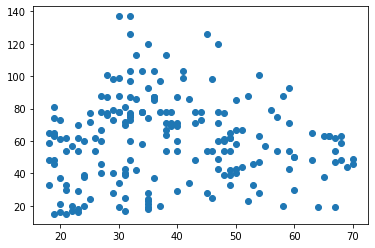

In [37]:
plt.scatter(df['Spending_Score'],df['Annual_Income'])

#### Run KMeans Clustering algorithm with n_cluster

In [38]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [39]:
y_predicted = km.fit_predict(df[['Age','Annual_Income']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [40]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [41]:
km.cluster_centers_

array([[ 55.81481481,  51.77777778],
       [ 30.34693878,  29.26530612],
       [ 31.95890411,  72.95890411],
       [ 39.        , 106.5       ]])

#### Visualize the clusters

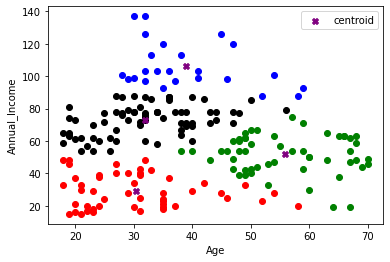

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
#df5 = df[df.cluster==4]

plt.scatter(df1.Age,df1.Annual_Income, color='green')
plt.scatter(df2.Age,df2.Annual_Income, color='red')
plt.scatter(df3.Age,df3.Annual_Income, color='black')
plt.scatter(df4.Age,df4.Annual_Income, color='blue')
#plt.scatter(df5.Age,df5.Annual_Income, color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='X',label='centroid')
plt.xlabel('Age')
plt.ylabel('Annual_Income')
plt.legend()

In [17]:
# Run with MinMaxScaler to see if needed
#scaler = MinMaxScaler()
#scaler.fit(df['Annual_Income'])
#df['Annual_Income_scaled'] = scaler.transform(df['Annual_Income'])

### Determine the optimal n_clusters with Elbow Techique

In [30]:
k_range = range(1,10) # select a range for K
sse = []  # sum of squares is put into array

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual_Income']])
    sse.append(km.inertia_) # append SSE error to array, inertia calculates error

In [31]:
# View the sum of squares array
sse

[176108.77999999997,
 87121.56591478694,
 59486.961439280356,
 39502.778500645385,
 31659.353138717805,
 25399.022004416987,
 21935.915573523533,
 18748.838032961186,
 16073.275866126214]

#### Visualize Elbow technique: SSE vs. K

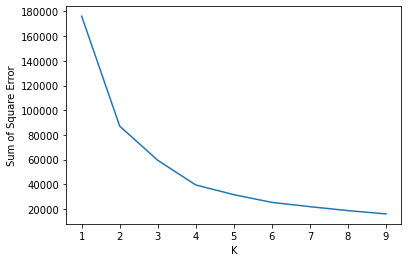

In [48]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range,sse)

# optimal K exists where the plot "elbows", i.e., K = 4 number of clusters

#### Re-run KMeans with optimal K, if necessary